**Сборный проект** 

**Анализ продаж игр, оценок пользователей и экспертов, жанров и платформ**

Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Нам необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Шаг 1. Откройте файл с данными и изучите общую информацию**

In [1]:
#импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
#сохраненяем данные в переменную data
data = pd.read_csv('/datasets/games.csv')
#смотрим первые 10 строк таблицы
display(data.head(10))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
#смотрим типы данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [5]:
data['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [6]:
data['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

В данных присутствуют пропуски в различных столбцах. Пропуски в year of release могли быть допущены из-за ошибки при вводе данных. Отсутствия значений в оценках критиков и пользователей и рейтинге могли произойти из-за недостатка данных либо ошибке при вводе имеющихся данных. Также есть аномальные значения в User_Score (tbd) и Rating (K-A). Нужно привести названия столбцов к нижнему регистру. Также необходимо изменить тип данных Year_of_Release с float64 на int64, потому что это год, а User_Score с object на float, потому что для оценки вещественный тип данных более корректен для анализа.

**Подготовка данных**

In [7]:
# переводим названия столбцов в нижний регистр
data.columns=data.columns.str.lower() 

**Отработка пропусков**

In [8]:
data.loc[data['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропуски наблюдаются у платформы Gen в 1993 году. Во многих колонках пропуск, и нет возможности эти пропуски заполнить.Удалим эти строки, чтобы они не искажали данные.

In [9]:
data=data.dropna(subset=['name'])

In [10]:
#year_nan=data.loc[data['year_of_release'].isnull()]
#year_nan.head()

Решил заполнить пропущенные значения средним для каждой платформы.

In [11]:
#mean_year=data.groupby('platform')['year_of_release'].transform('mean')
#data['year_of_release'].fillna(mean_year,inplace=True)

In [12]:
data['genre'].isna().sum()

0

In [13]:
for i in data[data['year_of_release'].isnull() == True].index:  
    data['year_of_release'][i] = data.loc[data['name'] == data['name'][i], 'year_of_release'].max()

In [14]:
data['year_of_release'].isna().sum()

146

Пропуски в столбце genre исчезли, что говорит о том, что мы их удалили в результате предыдущей обработки других столбцов.

В столбце user_score определим значение tbd - to be decided. Само значение находится во всех жанрах, а по описанию столбца у всех данных должен быть тип float. Поэтому будем счиать tbd отсутсвием значения и поменяем tbd на none.

In [15]:
# Функция для замены значения 'tbd' на none
#data['user_score']=data['user_score'].replace('tbd','Nan') 
data['user_score'] = data['user_score'].replace('tbd', np.nan, regex=True)
#проверяем уникальные значения
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [16]:
nan_critic=data[data['critic_score'].isnull()]
nan_critic.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


Заполним пропущенные значения в critic_score средним значением по жанру.

In [17]:
#mean_critic_genre=data.groupby('platform')['critic_score'].transform('mean')
#data['critic_score'].fillna(mean_critic_genre,inplace=True)
data['critic_score'].isnull().sum()

8576

Удалим оставшиеся пропуски в данных

In [18]:
#data.dropna(subset=['critic_score'],inplace=True)
# меняем тип данных на вещественны
data['user_score']=data['user_score'].astype('float64') 
data['critic_score'].isnull().sum()

8576

In [19]:
null_user_score=data[data['user_score'].isnull()]
null_user_score.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


Мы уже заполнили значения tbd на nan. Теперь заменим оставшиеся пропущенные значения средними значениями по платформе. Перед этим поменяем тип данных в user_score на вещественный.

In [20]:
# Делаю замену nan на значения соответствующих конкретной платформе средним значением
#data['user_score'].fillna('none',inplace=True)
data['user_score'].isnull().sum()

9123

In [21]:
display(data['rating'].isna().sum())
data['rating'].value_counts()

6764

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

Удалим строки со значением K-A, так как их немного и такого рейтинга в ESRB не существует.

In [22]:
data=data.query('rating!="K-A"')

Оставшиеся пропуски заполним самым популярным значением по жанру для данной платформы

In [23]:
#without_nan=data.dropna() # данные без nan в rating
# создадим функицю для определения самого популярного возрастного ограничения в зависимости от жанра в данной платформе 
#def best_rating(row):
    #platform_for_group=row['platform']
    #data_rating=without_nan.loc[without_nan['platform']==platform_for_group]
    #grouped=data_rating.groupby('rating')['genre'].count().sort_values(ascending=False)
    #return grouped.index[0]
#data['rating_fixed']=data.apply(best_rating,axis=1) #записываю новые данные в столбец data['rating_new']
#data['rating']=data['rating'].fillna(data['rating_fixed'])# Заменяю nan на данные из data['rating_new']
#del data['rating_fixed'] # Удаляю этот столбец

In [24]:
#data['rating'].fillna('none')
data['rating'].isna().sum()

6764

In [25]:
data['rating'].fillna('none',inplace=True)

In [26]:
data['na_sales_sum']=data['na_sales'].sum()# Столбец с суммарной продажей в Америке
data['eu_sales_sum']=data['eu_sales'].sum()# Столбец с суммарной продажей в Европе
data['jp_sales_sum']=data['jp_sales'].sum()# Столбец с суммарной продажей в Японии
data['all_sales']=data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']# Столбец с суммарной продажей всех
#удаляю ненужные столбцы
del data['na_sales_sum']
del data['eu_sales_sum']
del data['jp_sales_sum']

In [27]:
display(data.isnull().sum())
data.head(10)

name                  0
platform              0
year_of_release     146
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8574
user_score         9123
rating                0
all_sales             0
dtype: int64

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,none,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,none,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,none,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,none,28.31


**Вывод:** В результате предобработки данных были удалены пропуски в различных столбцах. Также были удалены аномальные значения в User_Score (tbd) и Rating (K-A). Были приведены названия столбцов к нижнему регистру. Также изменены типы данных Year_of_Release с float64 на int64 и User_Score с object на float.

**Исследовательский анализ данных**

Посмотрим, сколько игр выпускалось в разные годы.

<AxesSubplot:xlabel='year_of_release'>

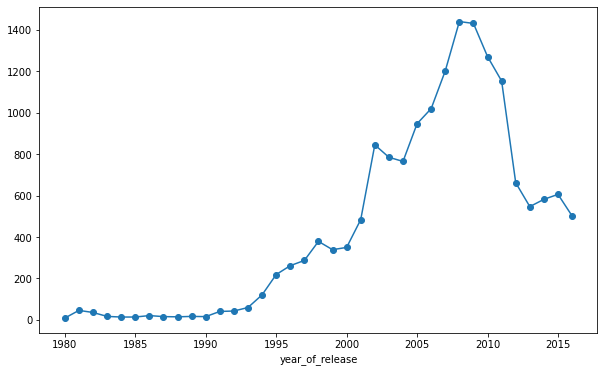

In [28]:
data.groupby('year_of_release')['name'].count().plot(x="year_of_release",style="-o",figsize=(10,6))

Анализируя график, можно увидеть, что до 1995 года игры почти не выходили. Отсюда делаем вывод, что данные с 1985-1995 г не важны. Затем наблюдаем резкий рост до 2009 года. После же идет спад.

Теперь посмотрим, как менялись продажи по платформам.

<AxesSubplot:xlabel='platform'>

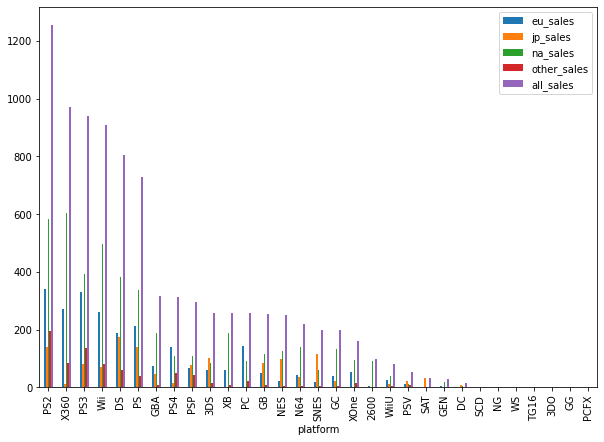

In [29]:
# Создадим датасет по платформам с продажами по регионам
best_platform=data.pivot_table(index='platform',values=['na_sales','eu_sales','jp_sales','other_sales'],aggfunc=('sum'))
# Создадим столбец, в котором будет сумма по всем регионам.
best_platform['all_sales']=best_platform['na_sales']+best_platform['eu_sales']+best_platform['jp_sales']+best_platform['other_sales']
best_platform.sort_values(by='all_sales',ascending=False).plot(kind='bar',figsize=(10,7))

График показывает, что в топ 5 платформ по выручке входят PS2,Xbox 360,PS3,Wii,DS.

<AxesSubplot:xlabel='year_of_release', ylabel='platform'>

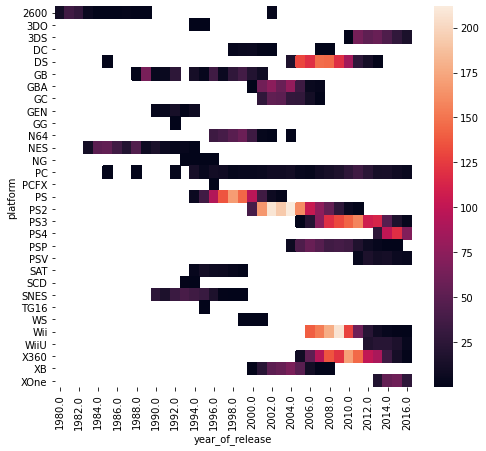

In [30]:
#создадим сводную таблицу платформ по годам
data_heat=data.pivot_table(index="platform",columns='year_of_release',values='all_sales',aggfunc=('sum'))
#сводная таблица платформ по годам. 
plt.figure(figsize=(8,7))
sns.heatmap(data_heat)

По тепловой карте можно увидеть платформы, у которых один производитель, и какие платформы приходят на замену. Например можно увидеть "лестницу" производителей Sony(PS,PS2,PS3,PS4,PSV) и Nintendo(DS,3DS).

<AxesSubplot:xlabel='year_of_release', ylabel='platform'>

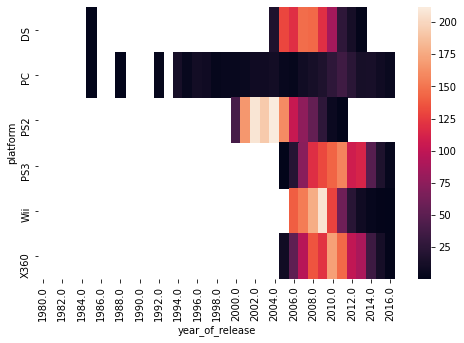

In [31]:
list_platform=['PS2','X360','PS3','Wii','DS','PC'] # топ 5 платформ 
top_platform=data_heat.query('platform in @list_platform') # срез по топ платформам
plt.figure(figsize=(8,5))
sns.heatmap(top_platform)

Анализирую тепловую карту, видим, что платформа в среднем живет 10-11 лет. Пик продаж приходит в среднем через 4-5 лет. В 2006 появились новые платформы, которые завоевали популярность. Например, когда продажи PS2 стали падать, на рынке появилась новая PS3. Платформа Wii с первого года имела высокие продажи, но с годами продажи падают.

<AxesSubplot:xlabel='platform'>

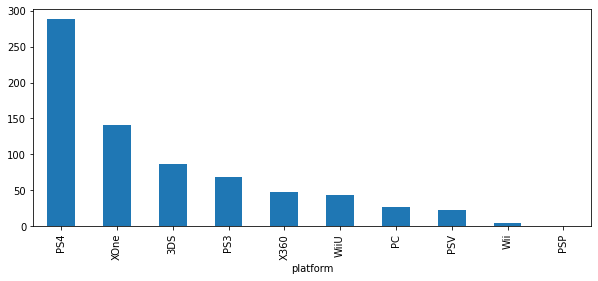

In [32]:
#  Для последующего анализа возьмем данные с 2007 года для актуального прогноза на 2017 год
actual_data=data.query('year_of_release>=2014')
actual_data.groupby('platform')['all_sales'].sum().sort_values(ascending=False).plot(figsize=(10,4),kind="bar")

<AxesSubplot:xlabel='year_of_release', ylabel='platform'>

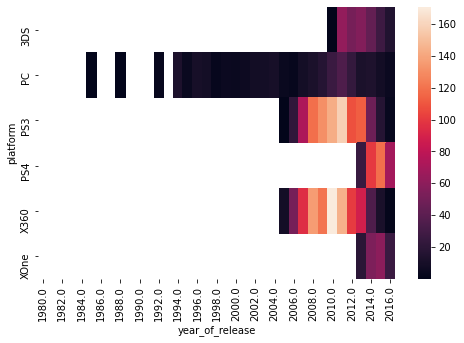

In [33]:
# Выберем активные на данный период и самые популярные и известные платформы
list_platform=['3DS','PS3','PS4','X360','XOne','PC']
top_platform=data_heat.query('platform in @list_platform')
plt.figure(figsize=(8,5))
sns.heatmap(top_platform)

Как можно увидеть, самой актуальной платформой можно назвать PS4, чьи продажи только начали падать. Основываясь на предыдущем графике, то можем сказать, что примерно через год или два появится новая платформа. Стоит отметить XOne, которая соренвуется с PS4, но имеет низкие продажи. Также можем увидеть, что почти у всех платформ продажи начинают падать примерно через 4-5 лет.

Теперь построим диаграмму "ящик с усами" для разбивки по платформам.

<AxesSubplot:xlabel='platform', ylabel='all_sales'>

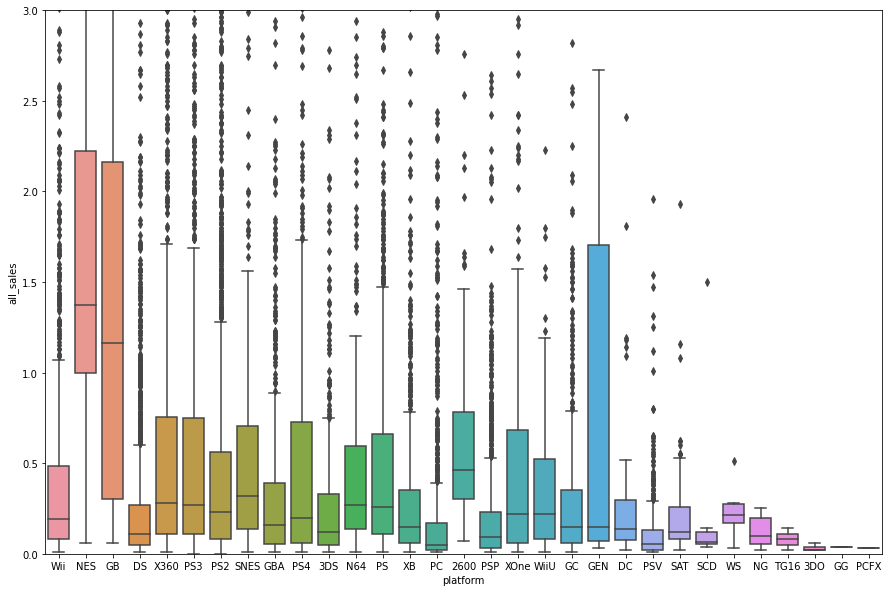

In [34]:
actual_data=data.query('platform in @list_platform and year_of_release>=2014')
plt.figure(figsize=(15,10))
plt.ylim(0,3)
sns.boxplot(x='platform',y='all_sales',data=data)

Анализируя график, можно отметить, что медиана и межквартальный размах очень похож у таких платформ, как PS,PS3,PS4, X360,XOne. Медиана равна примерно 0.28-0.29, все распределения скошены вправо. Медина лежит левее среднего значения у всех "ящиков". У других компаний и платформ медиана ниже, в районе 0.1-0.2

<AxesSubplot:xlabel='platform', ylabel='all_sales'>

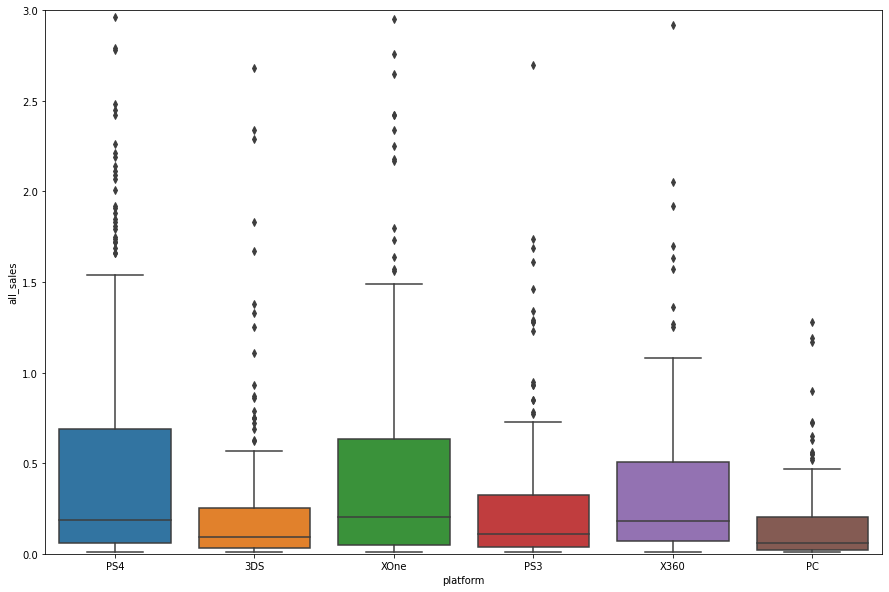

In [35]:
# рассмотрим самые популярные платформы
plt.figure(figsize=(15,10))
plt.ylim(0,3)
sns.boxplot(x='platform',y='all_sales',data=actual_data)

Анализируя эти платформы, можно увидеть, что они похожи, за исключением платформ 3DS, у которой третий квартиль меньше, чем у остальных. Медиана продаж у платформ почти одинакова и все скошены вправо. Для PC характерно те же признаки, однако медиана и третий квртиль ниже, чем у остальных.

Теперь посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Возьмем платформу XOne.

<AxesSubplot:title={'center':'Диаграмма рассеяния зависимости продаж платформы критики'}, xlabel='critic_score', ylabel='all_sales'>

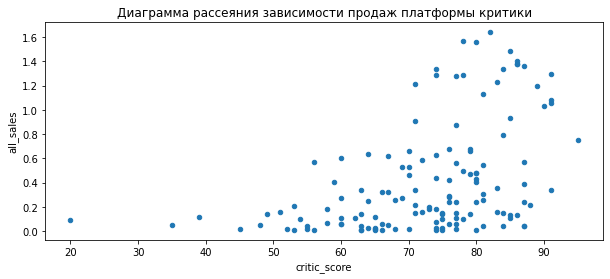

In [36]:
actual_data.query('platform=="XOne" and all_sales<=1.7').sort_values(by='critic_score',ascending=True).plot(kind='scatter',x='critic_score',y='all_sales',figsize=(10,4),title='Диаграмма рассеяния зависимости продаж платформы критики')

<AxesSubplot:title={'center':'Диаграмма рассеяния зависимости продаж платформы пользователи'}, xlabel='user_score', ylabel='all_sales'>

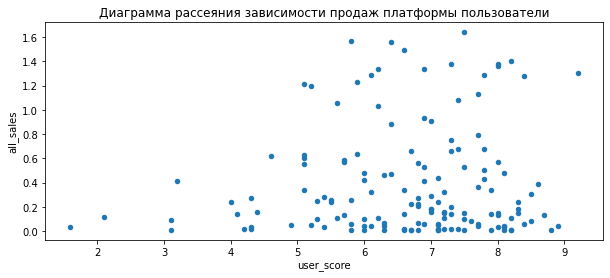

In [37]:
actual_data.query('platform=="XOne" and all_sales<=1.7').sort_values(by='user_score',ascending=True).plot(kind='scatter',x='user_score',y='all_sales',figsize=(10,4),title='Диаграмма рассеяния зависимости продаж платформы пользователи')

Оценивая графики, видим, что есть небольшая прямая зависимость между оценкой критиков и пользователей. Так, чем больше оценка, тем больше продажи. Плотнее всего с оценками пользователей в районе от 6-8 баллов с продажами до 0.5 млн. Что касается оценки критиков, то у них плотнее всего в районе от 60-80 баллов и до примерно 0.50 млн. 

In [38]:
XOne_actual=actual_data.query('platform=="XOne" and all_sales<=1.7')
XOne_actual['all_sales'].corr(XOne_actual['user_score'])
# Корреляция Пирсона между продажами и отзывами пользователей 

0.08112636904654254

In [39]:
XOne_actual['all_sales'].corr(XOne_actual['critic_score'])
# Корреляция Пирсона между продажами и отзывами критиков 

0.44656746994913427

По данным корреляции делаем вывод, что для платформы X360 есть небольшая прямая зависимость между продажами и отзывами критиков. Соответственно, чем лучше отзыв критика, тем выше продажи. Отзывы пользователей не сильно влияют на продажи, их коэффицент низкий, значит, корреляция слабая.

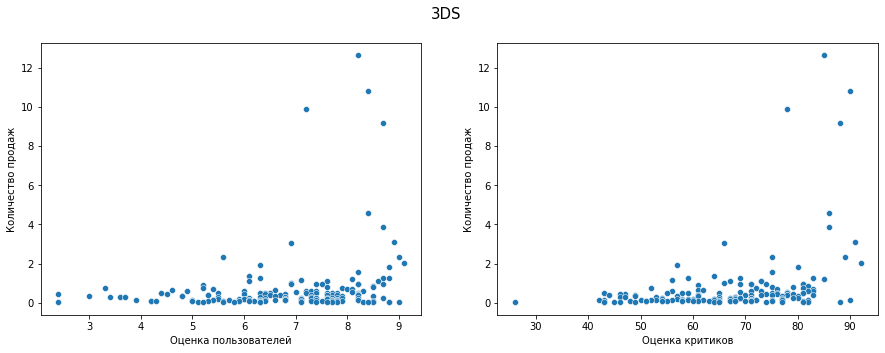

Корреляция между отзывами критиков и игровой платформой 3DS : Умеренная 0.3494009303924131
Корреляция между отзывами пользователей и продажами  3DS : Слабая 0.22480798039571082




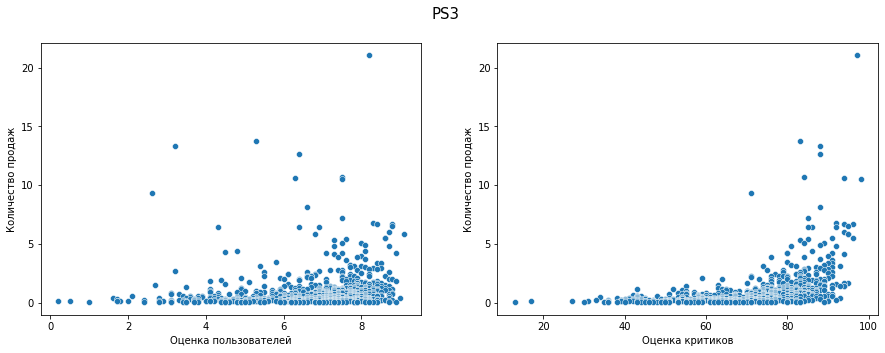

Корреляция между отзывами критиков и игровой платформой PS3 : Умеренная 0.43243156856420634
Корреляция между отзывами пользователей и продажами  PS3 : Слабая 0.12669133936341692




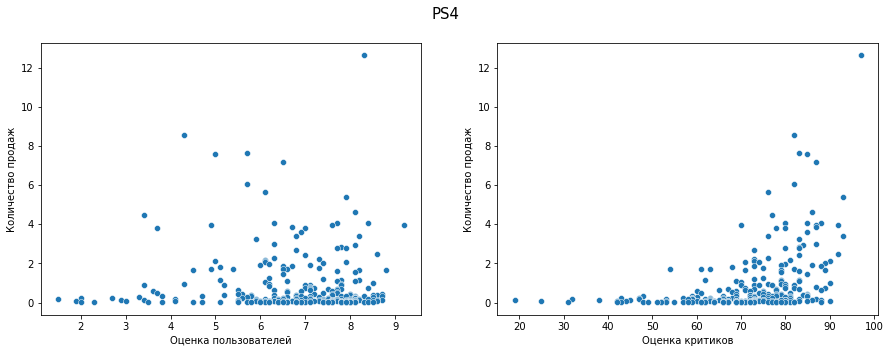

Корреляция между отзывами критиков и игровой платформой PS4 : Умеренная 0.40656790206178095
Корреляция между отзывами пользователей и продажами  PS4 : Обратная слабая -0.031957110204556376




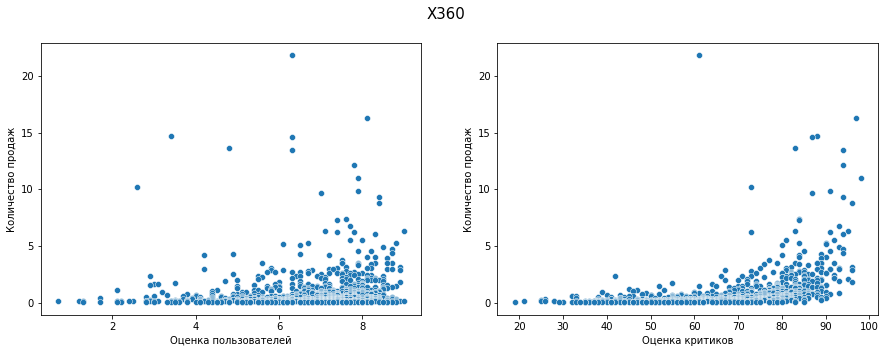

Корреляция между отзывами критиков и игровой платформой X360 : Умеренная 0.3937358653072584
Корреляция между отзывами пользователей и продажами  X360 : Слабая 0.11445882978454186




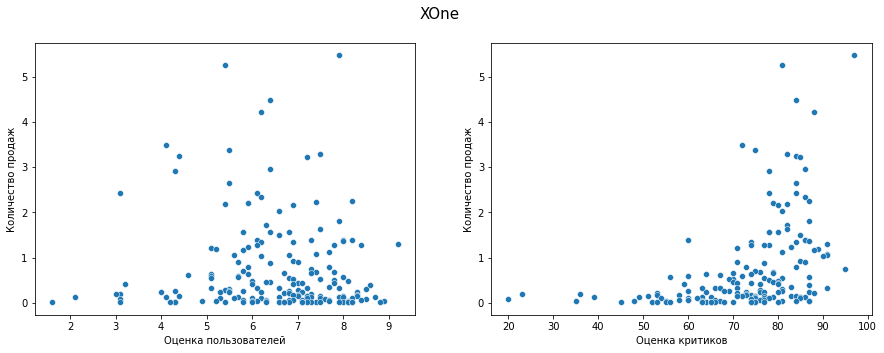

Корреляция между отзывами критиков и игровой платформой XONE : Умеренная 0.4169983280084017
Корреляция между отзывами пользователей и продажами  XONE : Обратная слабая -0.06892505328279414




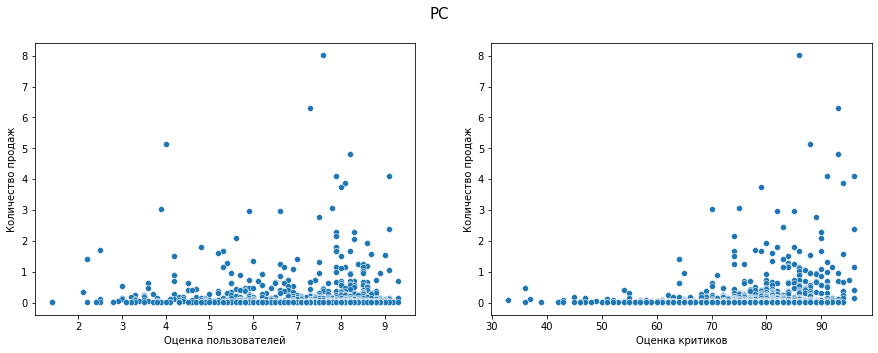

Корреляция между отзывами критиков и игровой платформой PC : Слабая 0.25688673789482114
Корреляция между отзывами пользователей и продажами  PC : Слабая 0.0055808194690084075




In [40]:
#Напишем функцию, которая будет отрисовывать графики рассеивания и считать корреляции
def other_platform(name_of_platform):
    platform = data[data['platform']==name_of_platform]
    fig, ax = plt.subplots(1 ,2, figsize=(15,5))
    sns.scatterplot(x='user_score', y='all_sales', data=platform, ax=ax[0])
    sns.scatterplot(x='critic_score', y='all_sales', data=platform, ax=ax[1])
    fig.suptitle(name_of_platform, fontsize=15)
    ax[0].set(xlabel='Оценка пользователей')
    ax[1].set(xlabel='Оценка критиков')
    ax[0].set(ylabel='Количество продаж')
    ax[1].set(ylabel='Количество продаж')
    plt.show()
    
    user_correl = platform['user_score'].corr(platform['all_sales'])
    critic_correl = platform['critic_score'].corr(platform['all_sales'])
    
    
    if 0.3 >= critic_correl >= 0:
        print('Корреляция между отзывами критиков и игровой платформой', name_of_platform.upper(), ': Слабая', critic_correl)
    if 0.5 >= critic_correl >= 0.3:
        print('Корреляция между отзывами критиков и игровой платформой', name_of_platform.upper(), ': Умеренная', critic_correl)
    if 1 >= critic_correl >= 0.5:
        print('Корреляция между отзывами критиков и игровой платформой', name_of_platform.upper(), ': Высокая', critic_correl)
    if 0 >= critic_correl >= -0.3:
        print('Корреляция между отзывами критиков и игровой платформой', name_of_platform.upper(), ': Обратная слабая', critic_correl)
    if -0.3 >= critic_correl >= -0.5:
        print('Корреляция между отзывами критиков и игровой платформой', name_of_platform.upper(), ': Обратная Умеренная', critic_correl)
    if -0.5 >= critic_correl >= -1:
        print('Корреляция между отзывами критиков и игровой платформой', name_of_platform.upper(), ': Обратная Высокая', critic_correl) 

    if 0.3 >= user_correl >= 0:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Слабая', user_correl)
    if 0.5 >= user_correl >= 0.3:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Умеренная', user_correl)
    if 1 >= user_correl >= 0.5:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Высокая', user_correl)
    if 0 >= user_correl >= -0.3:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Обратная слабая', user_correl)
    if -0.3 >= user_correl >= -0.5:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Обратная Умеренная', user_correl)
    if -0.5 >= user_correl >= -1:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Обратная Высокая', user_correl)    
    print('\n')
#С помощью цикла выведем все 5 графиков
for platform in list_platform:
    other_platform(platform)

По результатам анализа можем сказать, что в целом для остальных платформ ситуация та же самая, за исключением PC, у которого свзяь с отзывами крайне мала. Также стоит выдлеить слабую, но обратную связь между отзывами пользователей и продажами PS4 и XOne. В целом, к критикам прислушиваются больше, чем к отзывам пользователей.

Теперь рассмотрим общее распределение игр по жанрам

<AxesSubplot:xlabel='genre'>

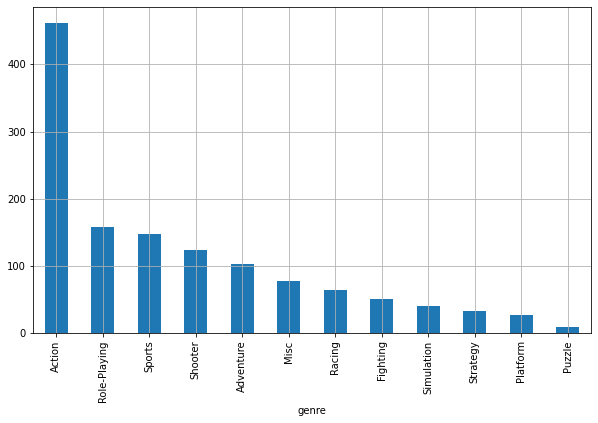

In [41]:
median_genre=actual_data.groupby('genre')['all_sales'].median().sort_values(ascending=False)
count_genre=actual_data.groupby('genre')['all_sales'].count().sort_values(ascending=False)
count_genre.plot(y='genre',grid=True,figsize=(10,6),kind='bar')

Больше всего продаются игры в жанре Action и Sports, а меньше всего игры в жанре puzzle и strategy. Разница в количестве продаж почти в 6 раз.

<AxesSubplot:title={'center':'Распределение по жанрам и глобальных медианных продаж'}, xlabel='genre'>

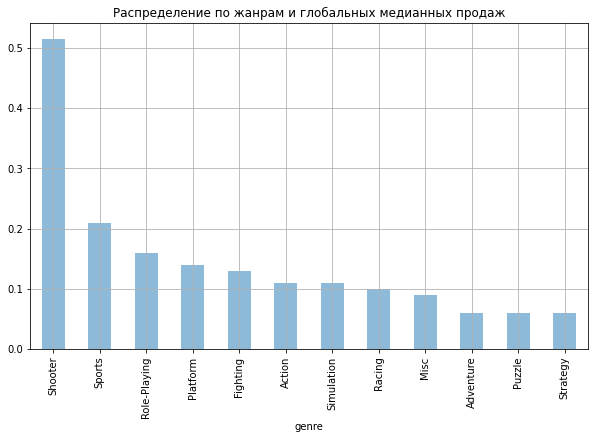

In [42]:
median_genre.plot(y='genre',grid=True,figsize=(10,6),kind='bar',alpha=0.5,title='Распределение по жанрам и глобальных медианных продаж')

Касательно выручки от продаж, самые высокие значения имеют игры в жанре shooter, fighting, sports. В это же время самый покупаемый жанр Action немного ниже. Меньше всего выручки у игр в жанре Adventure.

**Теперь составим портрет каждого региона** Для этого мы определим для пользователя каждого региона cамые популярные платформы (топ 5).

In [43]:
# Топ 5 продаж платформ в Северной Америке
na_sales_platform=actual_data.pivot_table(index='platform',values=['na_sales','all_sales'],aggfunc=('sum'))
na_sales_platform=na_sales_platform.sort_values(by='na_sales',ascending=False).head(5)
na_sales_platform['% sales']=na_sales_platform['na_sales']/na_sales_platform['all_sales'] #доля продаж
na_sales_platform

,all_sales,na_sales,% sales
platform,,,
PS4,288.15,98.61,0.342218
XOne,140.36,81.27,0.579011
X360,48.22,28.30,0.586893
3DS,86.68,22.64,0.261191
PS3,68.18,22.05,0.323409


Самая популярная платформа в Северной Америке- X360, затем PS3 c небольшой разницей. 

In [44]:
# Топ 5 продаж платформ в Европе
eu_sales_platform=actual_data.pivot_table(index='platform',values=['eu_sales','all_sales'],aggfunc=('sum'))
eu_sales_platform=eu_sales_platform.sort_values(by='eu_sales',ascending=False).head(5)
eu_sales_platform['% sales']=eu_sales_platform['eu_sales']/eu_sales_platform['all_sales'] #доля продаж
eu_sales_platform

,all_sales,eu_sales,% sales
platform,,,
PS4,288.15,130.04,0.451293
XOne,140.36,46.25,0.329510
PS3,68.18,25.54,0.374597
PC,27.40,18.22,0.664964
3DS,86.68,16.12,0.185971


Самая популярная платформа в Европе- PS3, затем Xbox 360. На 3 месте PS4.

In [45]:
# Топ 5 продаж платформ в Японии
jp_sales_platform=actual_data.pivot_table(index='platform',values=['jp_sales','all_sales'],aggfunc=('sum'))
jp_sales_platform=jp_sales_platform.sort_values(by='jp_sales',ascending=False).head(5)
jp_sales_platform['% sales']=jp_sales_platform['jp_sales']/jp_sales_platform['all_sales'] #доля продаж
jp_sales_platform

,all_sales,jp_sales,% sales
platform,,,
3DS,86.68,44.24,0.510383
PS4,288.15,15.02,0.052126
PS3,68.18,11.22,0.164564
XOne,140.36,0.32,0.002280
X360,48.22,0.08,0.001659


Самая популярная платформа в Японии 3DS, затем PS3. На 3 месте PS4.

<AxesSubplot:ylabel='% sales'>

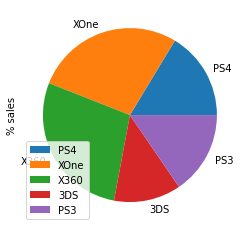

In [46]:
# для анализа долей продаж построим круговую диаграмму по каждому региону
na_sales_platform.plot(kind='pie',y="% sales")

В Северной Америке платформа X360 имеет больше половины всех продаж этой платформы. Для PS3 и PS4 доля всех продаж около 30-40%. Также почти четверть всех продаж у платформы 3DS и более 50% у XOne.

<AxesSubplot:ylabel='% sales'>

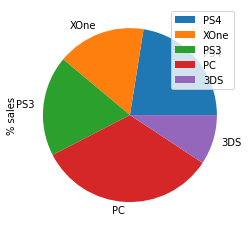

In [47]:
eu_sales_platform.plot(kind='pie',y="% sales")

График показывает, что почти 45% всех продаж PS4 приходится на Европу. Доли продаж X360,XOne,PS3 почти одинаковы и составляют примерно 30-35%.

<AxesSubplot:ylabel='% sales'>

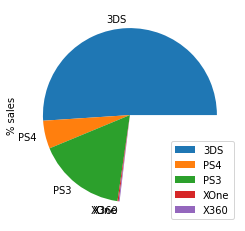

In [48]:
jp_sales_platform.plot(kind='pie',y="% sales")

В Японии платформа 3DS самая популярная и в этом регионе имеет самую большую долю продаж. Доли PS3 и PS4 почти одинаковы, примерно 10%.

Теперь рассмотрим для каждого региона топ 5 самых популярных жанров

In [49]:
# Топ 5 жанров в Северной Америке
na_sales_genre=actual_data.pivot_table(index='genre',values=['na_sales'],aggfunc=('sum'))
na_sales_genre=na_sales_genre.sort_values(by='na_sales',ascending=False).head(5)
na_sales_genre

,na_sales
genre,
Shooter,76.97
Action,66.59
Sports,45.51
Role-Playing,32.22
Misc,11.19


Самый популярный жанр в Северной Америке- это Action. Затем идут Shooter и Sports

In [50]:
# Топ 5 жанров в Европе
eu_sales_genre=actual_data.pivot_table(index='genre',values=['eu_sales'],aggfunc=('sum'))
eu_sales_genre=eu_sales_genre.sort_values(by='eu_sales',ascending=False).head(5)
eu_sales_genre

,eu_sales
genre,
Action,69.36
Shooter,64.08
Sports,44.66
Role-Playing,27.20
Racing,11.97


В Европе самые популярные жанры такие же как и в Северной Америке

In [51]:
# Топ 5 жанров в Японии
jp_sales_genre=actual_data.pivot_table(index='genre',values=['jp_sales'],aggfunc=('sum'))
jp_sales_genre=jp_sales_genre.sort_values(by='jp_sales',ascending=False).head(5)
jp_sales_genre

,jp_sales
genre,
Role-Playing,26.21
Action,23.79
Fighting,4.93
Shooter,3.33
Misc,2.90


В Японии на первом месте находится Role-Playing, затем Action и с большим отрывом Shooter. Это может быть обьяснено другим менталитетом и преобладанием аркадных автоматов и игр определеннного жанра в Японии.

Теперь посмотрим, влияет ли рейтинг ESRB на продажи в отдельном регионе

In [52]:
# Соотношение рейтинга и продаж в Северной Америке
na_sales_ESRB=actual_data.pivot_table(index='rating',values=['na_sales'],aggfunc=('sum'))
na_sales_ESRB=na_sales_ESRB.sort_values(by='na_sales',ascending=False)
na_sales_ESRB

,na_sales
rating,
M,95.26
none,60.29
E,42.51
T,36.55
E10+,25.55


In [53]:
# Соотношение рейтинга и продаж в Европе
eu_sales_ESRB=actual_data.pivot_table(index='rating',values=['eu_sales'],aggfunc=('sum'))
eu_sales_ESRB=eu_sales_ESRB.sort_values(by='eu_sales',ascending=False)
eu_sales_ESRB

,eu_sales
rating,
M,92.75
none,55.96
E,51.65
T,32.27
E10+,19.03


In [54]:
# Соотношение рейтинга ESRB и продаж в Японии
jp_sales_ESRB=actual_data.pivot_table(index='rating',values=['jp_sales'],aggfunc=('sum'))
jp_sales_ESRB=jp_sales_ESRB.sort_values(by='jp_sales',ascending=False)
jp_sales_ESRB

,jp_sales
rating,
none,45.65
T,10.36
M,7.03
E,5.47
E10+,2.37


<AxesSubplot:xlabel='rating'>

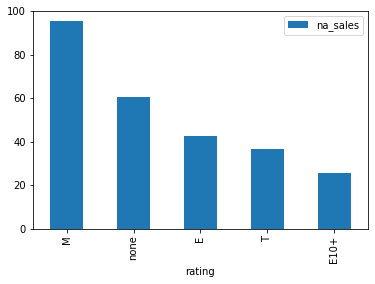

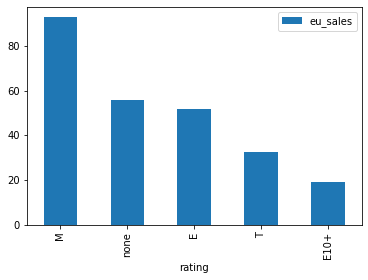

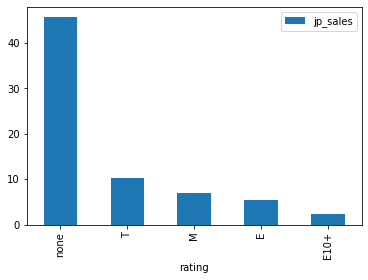

In [55]:
na_sales_ESRB.plot(kind='bar') # гисторгамма продаж по возрастных ограничений для Северной Америки
eu_sales_ESRB.plot(kind='bar') # гисторгамма продаж по возрастных ограничений для Европы
jp_sales_ESRB.plot(kind='bar') # гисторгамма продаж по возрастных ограничений для Японии

Анализируя полученные графики, можно сказать, что самые популярные возрастные ограничения в Северной Америке, Европе, Японии - это E, T, M, E10+. Также из-за заполнения пропусков на втором месте в Северной Америке и Европе и на первом в Японии стоит неизвестный рейтинг. В Северной Америке и Европе больше всего игр с категорией M и E, в Японии же больше всего T, затем M и Е. Также стоит отметить, что игр категории Е и Е+10 в Японии гораздо меньше чем в остальных регионах. Можно сделать вывод, что при разработке игры выбор региона для продажи может повлиять на её рейтинг и целевую аудиторию(дети, взрослые).

**Проверка гипотез**

Для формулирования и проверки гипотез я применил функцию ttest_ind. Сравнивая две совокупности и формулируя нулевую гипотезу, я эти совокупности приравняю и сравню со статистический значимостью. Формулирую двустороннюю гипотезу, а статистическая значимость будет равна 5%.

Предположение: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Тогда:

Нулевая гипотеза: cредний пользовательский рейтинг платформы XOne и PC равны.

Альтернативная гипотеза: cредний пользовательский рейтинг платформы XOne и PC не равны.

In [56]:
XOne_data=actual_data.query('platform=="XOne"')
PC_data=actual_data.query('platform=="PC"')
variance_XOne=np.var(XOne_data['user_score'],ddof=1)
print('Дисперсия для платформы XOne:',variance_XOne)
variance_PC=np.var(PC_data['user_score'],ddof=1)
print('Дисперсия для платформы PC:',variance_PC)

Дисперсия для платформы XOne: 1.8910066518847009
Дисперсия для платформы PC: 2.9167826202852196


In [57]:
result=st.ttest_ind(XOne_data['user_score'].dropna(),PC_data['user_score'].dropna(),equal_var=False) 
# проверяем равенство двух независимых совокупностей. Значения дисперсий разные, поэтому equal_var=False
alpha = .05 # критический уровень статистической значимости
#если p-value окажется меньше него - отвергнем гипотезу
print('p-значение:', result.pvalue)
if (result.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.139237120435483
Не получилось отвергнуть нулевую гипотезу


В результате теста делаем вывод, что средние пользовательские рейтинги платформ Xbox One и PC равны

Предположение: Средние пользовательские рейтинги жанров Action и Sports разные. Тогда:

Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports равны,

Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports различаются

In [58]:
action_data=actual_data.query('genre=="Action"')
sport_data=actual_data.query('genre=="Sports"')
variance_action_data=np.var(action_data['user_score'],ddof=1)
print('Дисперсия жанра Action пользовательского рейтинга:',variance_action_data)
variance_sport_data=np.var(sport_data['user_score'],ddof=1)
print('Дисперсия жанра Sport пользовательского рейтинга:',variance_sport_data)

Дисперсия жанра Action пользовательского рейтинга: 1.8730831769856158
Дисперсия жанра Sport пользовательского рейтинга: 3.414333333333333


In [59]:
results=st.ttest_ind(action_data['user_score'].dropna(),sport_data['user_score'].dropna(),equal_var=False) 
# проверяем равенство двух независимых совокупностей. Значения дисперсий разные, поэтому equal_var=False
alpha = .05 # критический уровень статистической значимости
#если p-value окажется меньше него - отвергнем гипотезу
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.086701057178146e-13
Отвергаем нулевую гипотезу


В результате теста делаем вывод, что средние пользовательские рейтинги жанров Action и Sports не равны

**Общий вывод:**

В результате этой работы был проведен анализ данных о продажах различных игр, оценках пользователей и экспертов, жанрах и платформах. В результате предобработки данных были изменены названия столбцов, обработаны пропуски и приведены к нужным типы данных. После этого исследовательский анализ показал, что:

1) самые популярные платформы - PS4,XOne,X360,PS3,3DS

2) самая перспективная платформа - PS4, но также можно выделить и XОne, которая вышла недавно

3) самые прибыльные игры - игры в жанре action для Европы и Америки и role-playing в Японии

4) самый выпускаемый жанр - action

5) при разработке игры выбор региона для продажи может повлиять на её рейтинг и целевую аудиторию(дети, взрослые) в зависимости от региона

6) В Северной Америке и Европе больше всего игр с категорией M и E, в Японии же больше всего T, затем M и Е. Также из-за заполнения пропусков на втором месте в Северной Америке и Европе и на первом в Японии стоит неизвестный рейтинг, что может быть вызвано ошибкой при введении данных или рейтинг у игры не был определён.

Были проверены 2 гипотезы, по результатам проверки:
Средние пользовательские рейтинги платформ Xbox One и PC равны
Cредние пользовательские рейтинги жанров Action и Sports не равны
Соотвественно, рекламную кампанию надо планировать для игр, выходящих на Playstation 4 и XOne и игр жанра action, shooter и role-playing.